In [17]:
# Import pandas for data handling
import pandas as pd

import numpy as np

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re
# import json
import json

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score ,confusion_matrix


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [42]:
list_dic = []
with open('data/News_Category_Dataset_v2.json') as json_file:
    for the_file in json_file:
        list_dic.append(json.loads(the_file))

In [19]:
len(list_dic)

200853

In [43]:
df = pd.DataFrame(list_dic)

In [21]:
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [22]:
df.shape

(200853, 6)

In [23]:
df.isnull().sum()

category             0
headline             0
authors              0
link                 0
short_description    0
date                 0
dtype: int64

In [24]:
df.duplicated().sum()

13

In [25]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [10]:
base_dupe = df[df.headline.duplicated()]
data_groups = base_dupe[['headline','category']].groupby(['headline']).sum()
print(data_groups)

                                                                                      category
headline                                                                                      
                                                    RELIGIONWORLDPOSTBUSINESSMEDIAQUEER VOICES
'Black Love' Wedding Announcements (PHOTOS)               BLACK VOICESBLACK VOICESBLACK VOICES
'CR Fashion Book,' Carine Roitfeld's New Magazi...                              STYLE & BEAUTY
'Fifty Shades Of Grey' Fashion Ads Were Kind Of...                              STYLE & BEAUTY
'Riding The Dog': Coast-To-Coast By Greyhound Bus                                       TRAVEL
...                                                                                        ...
Yves Saint Laurent Name Change: No More 'Yves' ...                              STYLE & BEAUTY
Zac Efron's Jean Jacket Is Truly Unacceptable (...                              STYLE & BEAUTY
Zac Posen: 'I Design For Women With Bodies' (PH...

In [11]:
df.headline.duplicated().sum()

1496

In [26]:
print(len(df[df['headline'] == ""]))

6


In [27]:
df.category.value_counts()

POLITICS          32738
WELLNESS          17824
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9646
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3489
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2078
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1322
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

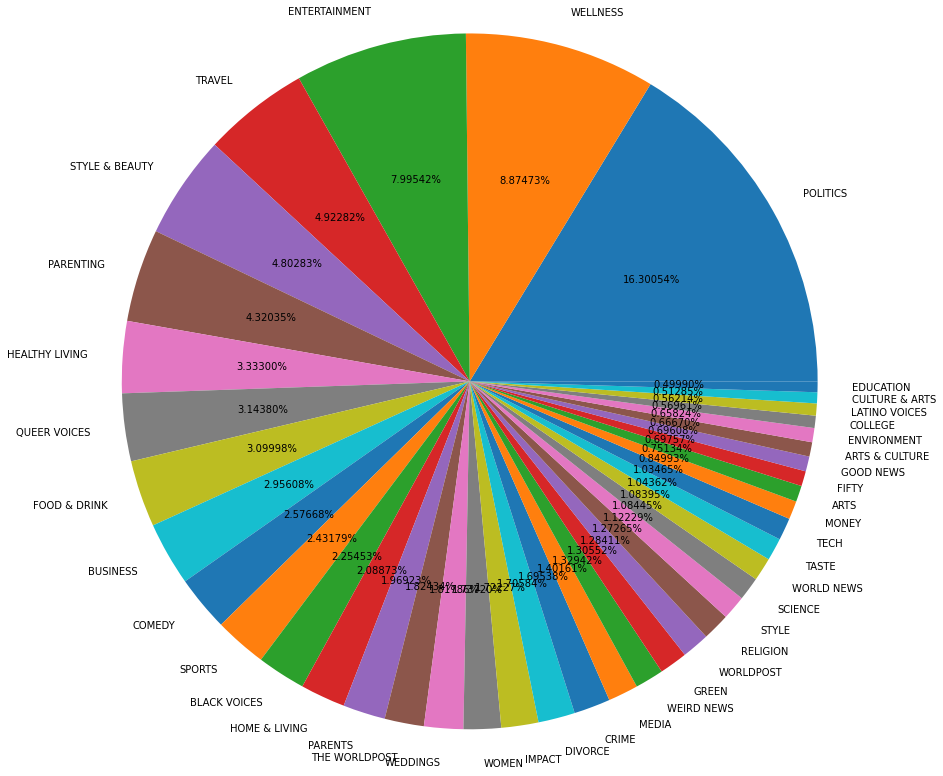

In [14]:
data = df.category.value_counts()

plt.pie(data , labels = data.keys(), autopct="%0.5f%%", radius = 4)
plt.show()

In [44]:
cate = 'MEDIA'
df.loc[df['category'] == cate]

,category,headline,authors,link,short_description,date
127,MEDIA,Jake Tapper Shreds Donald Trump With A Long Li...,Lee Moran,https://www.huffingtonpost.com/entry/jake-tapp...,"""I could go on, but this is just an hour show.""",2018-05-24
128,MEDIA,New York Daily News Rips NFL Over Anthem Kneel...,Lee Moran,https://www.huffingtonpost.com/entry/new-york-...,"""NFL DISHONORS THE FLAG""",2018-05-24
259,MEDIA,'60 Minutes' Reporter Reveals Trump's Chilling...,Sara Boboltz,https://www.huffingtonpost.com/entry/60-minute...,Lesley Stahl said Trump admitted that he attac...,2018-05-22
345,MEDIA,David Hogg Calls On Media To Stop Naming Santa...,Rebecca Shapiro,https://www.huffingtonpost.com/entry/david-hog...,"""We make these sick people known worldwide for...",2018-05-20
396,MEDIA,Hannity Flips Out: Mueller Probe 'Is A Direct ...,Ed Mazza,https://www.huffingtonpost.com/entry/sean-hann...,"""Mueller is causing irreparable damage to the ...",2018-05-18
...,...,...,...,...,...,...
124735,MEDIA,NBC News Makes Bizarre Move To Boost David Gre...,Katherine Fung,https://www.huffingtonpost.com/entry/nbc-news-...,,2014-04-21
124763,MEDIA,Glenn Greenwald Reacts To Pulitzer Prize,Katherine Fung,https://www.huffingtonpost.com/entry/glenn-gre...,,2014-04-20
124806,MEDIA,David Brooks: Obama Has A 'Manhood Problem In ...,Katherine Fung,https://www.huffingtonpost.com/entry/david-bro...,,2014-04-20
124922,MEDIA,Magazine Faces Lawsuit For Racist Article,Carla Herreria,https://www.huffingtonpost.com/entry/otis-care...,,2014-04-18


## Helper funcitons for text

In [28]:
#functions to clean up text
def return_lower(text):
    return text.lower()

def remove_punctuation(text):
    text = re.sub(r'[^\w\s]','', text)
    return text

def remove_stopwords(text):
    words = word_tokenize(text)
    valid_words = []
    for word in words:
        if word not in stopwords:
            valid_words.append(word)
    text = " ".join(valid_words)
    return text;

def stem_words(text):
    #initialize stemmer
    porter = PorterStemmer()
    #tokenize words
    words = word_tokenize(text)
    #place to append valid words
    valid_words = []
    
    for word in words:
        stem_word = porter.stem(word)
        valid_words.append(stem_word)
    text = " ".join(valid_words)
    return text

def text_pipeline(input_string):
    input_string = return_lower(input_string)
    input_string = remove_punctuation(input_string)
    #input_string = remove_stopwords(input_string)
    #input_string = stem_words(input_string)
    return input_string

In [29]:
df['headline_clean'] = df['headline'].apply(text_pipeline)

print("ORIGINAL TEXT\n:", df['headline'][0])
print("CLEANDED TEXT\n:", df['headline_clean'][0])

ORIGINAL TEXT
: There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV
CLEANDED TEXT
: there were 2 mass shootings in texas last week but only 1 on tv


In [17]:
'''
import tensorflow_hub as hub

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)'''

'\nimport tensorflow_hub as hub\n\nmodule_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]\nmodel = hub.load(module_url)\nprint ("module %s loaded" % module_url)\ndef embed(input):\n  return model(input)'

# Goal: make a subsampled df where we get an even value counts

In [30]:
categories = df.category.unique()
categories

array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

## Group similar categories, bigger buckets & better predicitons

In [31]:
def regroup(grouplist,name):
    for cat in categories:
        if cat in grouplist:
            df.loc[df['category'] == cat, 'category'] = name

In [32]:
regroup( grouplist= ['WELLNESS', 'HEALTHY LIVING','HOME & LIVING','STYLE & BEAUTY' ,'STYLE'] , name =  'LIFESTYLE AND WELLNESS')

regroup( grouplist= ['PARENTING', 'PARENTS' ,'EDUCATION' ,'COLLEGE'] , name =  'PARENTING / EDUCATION')

regroup( grouplist= ['SPORTS','ENTERTAINMENT' , 'COMEDY', 'WEIRD NEWS', 'ARTS'] , name =  'SPORTS AND ENTERTAINMENT')

regroup( grouplist= ['TRAVEL', 'ARTS & CULTURE','CULTURE & ARTS','FOOD & DRINK', 'TASTE'] , name =  'TRAVEL-TOURISM / ART-CULTURE')

regroup( grouplist= ['WOMEN', 'QUEER VOICES', 'LATINO VOICES', 'BLACK VOICES'] , name =  'EMPOWERED VOICES')

regroup( grouplist= ['BUSINESS',  'MONEY'] , name =  'BUSINESS-MONEY')

regroup( grouplist= ['THE WORLDPOST' , 'WORLDPOST' , 'WORLD NEWS'] , name =  'WORLDNEWS')

regroup( grouplist= ['ENVIRONMENT', 'GREEN'] , name =  'ENVIRONMENT')

regroup( grouplist= ['TECH', 'SCIENCE'] , name =  'SCIENCE AND TECH')

regroup( grouplist= ['FIFTY', 'IMPACT' ,'GOOD NEWS', 'CRIME'] , name =  'GENERAL')

regroup( grouplist= ['WEDDINGS', 'DIVORCE',  'RELIGION', 'MEDIA'] , name =  'MISC')

In [21]:
df.category.value_counts()

LIFESTYLE AND WELLNESS          40613
POLITICS                        32738
SPORTS AND ENTERTAINMENT        30296
TRAVEL-TOURISM & ART-CULTURE    20578
EMPOWERED VOICES                15460
PARENTING AND EDUCATION         14780
MISC                            12448
GENERAL                          9663
WORLDNEWS                        8420
BUSINESS-MONEY                   7644
SCIENCE AND TECH                 4256
ENVIRONMENT                      3944
Name: category, dtype: int64

In [22]:
df.duplicated().sum()

0

In [23]:
print(len(df[df['headline'] == ""]))

6


In [33]:
df.loc[df['headline'] == "", 'headline'] = np.nan
df.dropna(subset=['headline'], inplace=True)
print(len(df[df['headline'] == ""]))

0


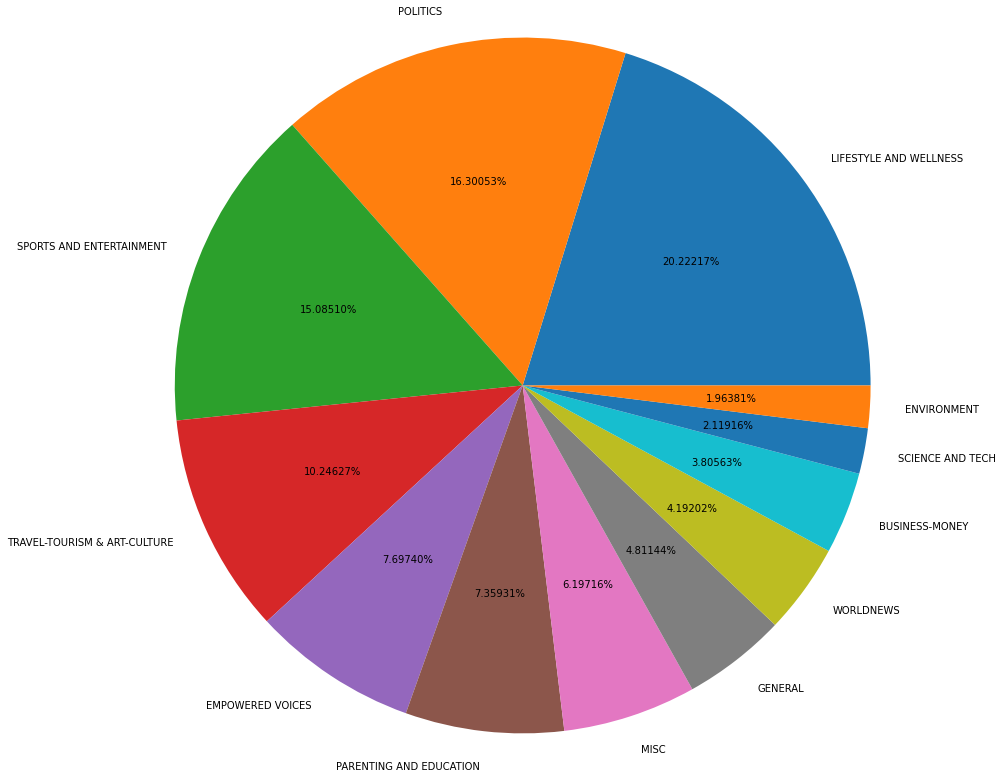

In [25]:
data = df.category.value_counts()

plt.pie(data , labels = data.keys(), autopct="%0.5f%%", radius = 4)
plt.show()

In [34]:
X = df['headline_clean'].values
y = df['category'].values

vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

## We still have an imbalance, so we try to make it balanced

In [35]:

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_rus, y_rus = rus.fit_resample(X, y)


In [36]:

print('original dataset shape:', y.shape, X.shape)
print('Resample dataset shape', y_rus.shape, X_rus.shape)


original dataset shape: (200834,) (200834, 67431)
Resample dataset shape (47328,) (47328, 67431)


In [37]:

total_rus = pd.DataFrame(y_rus, columns = ['category'])
total_rus.category.value_counts()


ENVIRONMENT                     3944
SCIENCE AND TECH                3944
WORLDNEWS                       3944
BUSINESS-MONEY                  3944
SPORTS AND ENTERTAINMENT        3944
MISC                            3944
PARENTING AND EDUCATION         3944
TRAVEL-TOURISM & ART-CULTURE    3944
EMPOWERED VOICES                3944
GENERAL                         3944
LIFESTYLE AND WELLNESS          3944
POLITICS                        3944
Name: category, dtype: int64

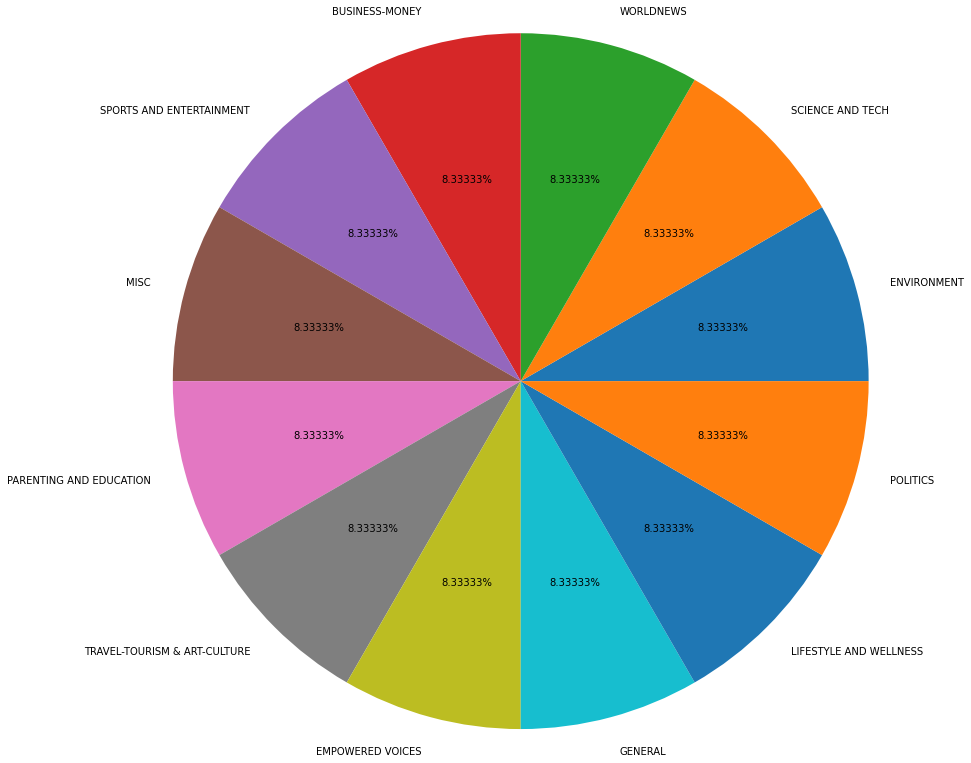

In [38]:

data = total_rus.category.value_counts()
plt.pie(data, labels = data.keys(), autopct="%0.5f%%", radius = 4)
plt.show()


# Train and test Models

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=102121)

In [45]:
def build_and_eval_model(model, X, y, random_state=0):
    
    X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size = 0.25, random_state = random_state,shuffle=True)
    
    model.fit(X_train, y_train)
    
    accuracy = model.score(X_test, y_test)
    print("Accuracy %f" % accuracy)
    
    y_pred = model.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))
    
    fig, ax = plt.subplots(figsize=(15,15))
    metrics.plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test, ax=ax)

Accuracy 0.628803
                              precision    recall  f1-score   support

              BUSINESS-MONEY       0.63      0.66      0.64       987
            EMPOWERED VOICES       0.62      0.53      0.57       987
                 ENVIRONMENT       0.67      0.67      0.67      1043
                     GENERAL       0.53      0.49      0.51       971
      LIFESTYLE AND WELLNESS       0.53      0.61      0.56       957
                        MISC       0.76      0.62      0.68      1018
     PARENTING AND EDUCATION       0.61      0.63      0.62       915
                    POLITICS       0.65      0.63      0.64       964
            SCIENCE AND TECH       0.69      0.73      0.71       970
    SPORTS AND ENTERTAINMENT       0.52      0.58      0.55       987
TRAVEL-TOURISM & ART-CULTURE       0.66      0.66      0.66      1014
                   WORLDNEWS       0.71      0.73      0.72      1019

                    accuracy                           0.63     11832


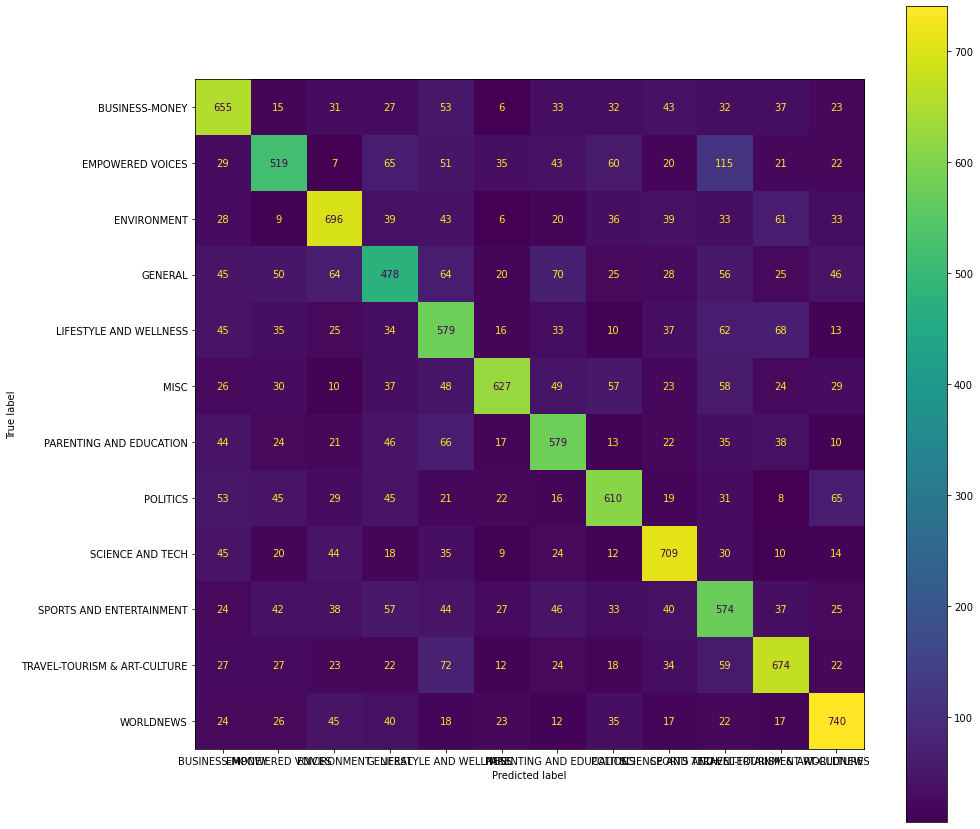

In [46]:
build_and_eval_model(model = LogisticRegression(max_iter = 1000), X = X, y = y)

Accuracy 0.619168
                              precision    recall  f1-score   support

              BUSINESS-MONEY       0.69      0.66      0.67       987
            EMPOWERED VOICES       0.65      0.50      0.57       987
                 ENVIRONMENT       0.64      0.58      0.61      1043
                     GENERAL       0.61      0.51      0.56       971
      LIFESTYLE AND WELLNESS       0.41      0.61      0.49       957
                        MISC       0.80      0.62      0.70      1018
     PARENTING AND EDUCATION       0.59      0.69      0.64       915
                    POLITICS       0.65      0.64      0.65       964
            SCIENCE AND TECH       0.74      0.77      0.75       970
    SPORTS AND ENTERTAINMENT       0.51      0.49      0.50       987
TRAVEL-TOURISM & ART-CULTURE       0.61      0.63      0.62      1014
                   WORLDNEWS       0.67      0.72      0.69      1019

                    accuracy                           0.62     11832


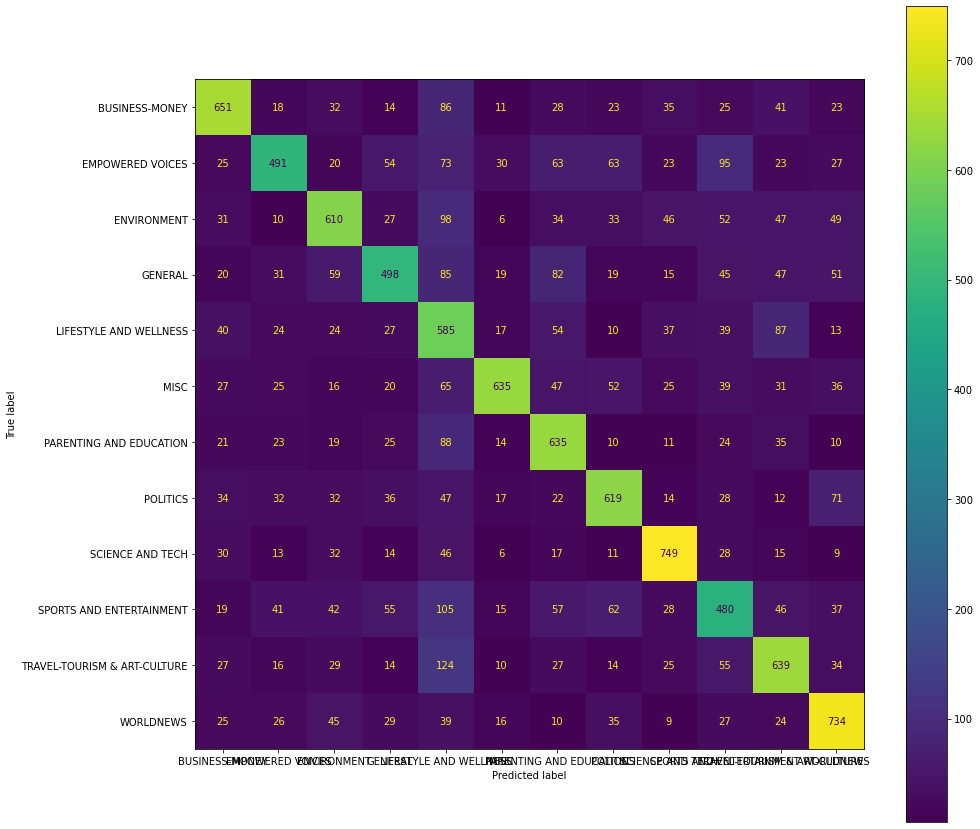

In [47]:
build_and_eval_model(model = RandomForestClassifier(), X = X, y = y)

Accuracy 0.661680
                              precision    recall  f1-score   support

              BUSINESS-MONEY       0.69      0.69      0.69       987
            EMPOWERED VOICES       0.65      0.56      0.60       987
                 ENVIRONMENT       0.70      0.67      0.68      1043
                     GENERAL       0.58      0.58      0.58       971
      LIFESTYLE AND WELLNESS       0.52      0.65      0.57       957
                        MISC       0.83      0.65      0.73      1018
     PARENTING AND EDUCATION       0.66      0.68      0.67       915
                    POLITICS       0.69      0.66      0.67       964
            SCIENCE AND TECH       0.80      0.76      0.78       970
    SPORTS AND ENTERTAINMENT       0.47      0.65      0.55       987
TRAVEL-TOURISM & ART-CULTURE       0.71      0.67      0.69      1014
                   WORLDNEWS       0.79      0.74      0.76      1019

                    accuracy                           0.66     11832


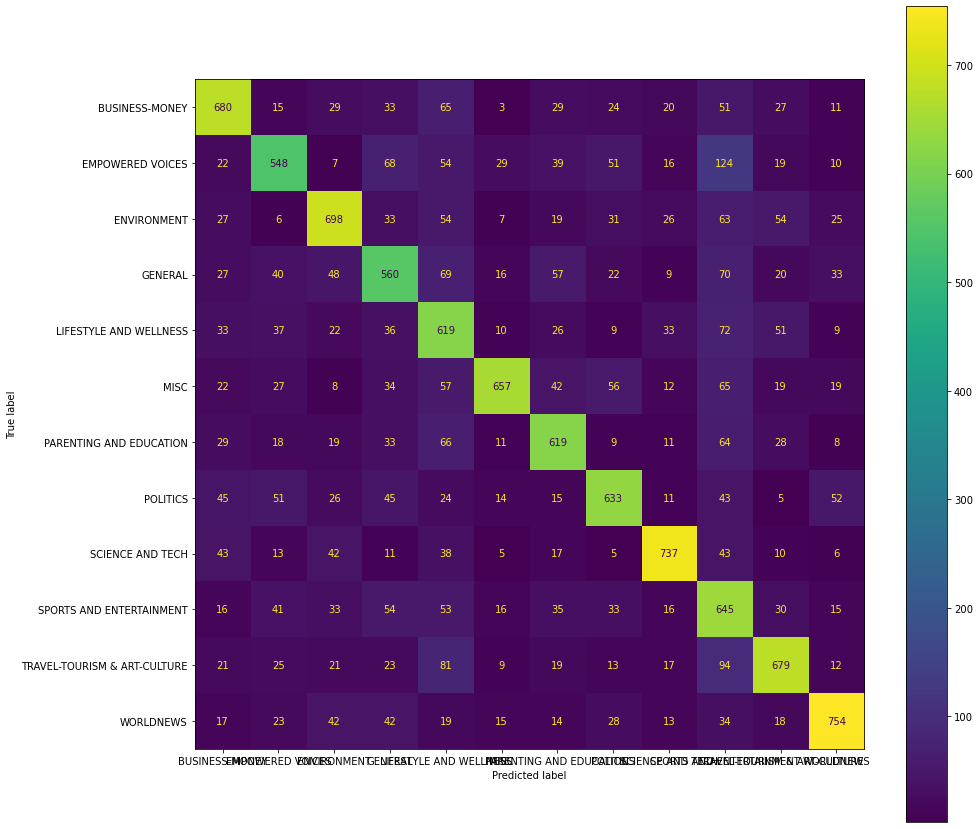

In [48]:
build_and_eval_model(model = svm.SVC(), X = X, y = y)

Accuracy 0.617816
                              precision    recall  f1-score   support

              BUSINESS-MONEY       0.66      0.68      0.67       987
            EMPOWERED VOICES       0.56      0.53      0.54       987
                 ENVIRONMENT       0.65      0.63      0.64      1043
                     GENERAL       0.53      0.51      0.52       971
      LIFESTYLE AND WELLNESS       0.56      0.51      0.53       957
                        MISC       0.64      0.60      0.62      1018
     PARENTING AND EDUCATION       0.53      0.62      0.57       915
                    POLITICS       0.59      0.63      0.61       964
            SCIENCE AND TECH       0.71      0.74      0.73       970
    SPORTS AND ENTERTAINMENT       0.55      0.55      0.55       987
TRAVEL-TOURISM & ART-CULTURE       0.73      0.64      0.68      1014
                   WORLDNEWS       0.71      0.75      0.73      1019

                    accuracy                           0.62     11832


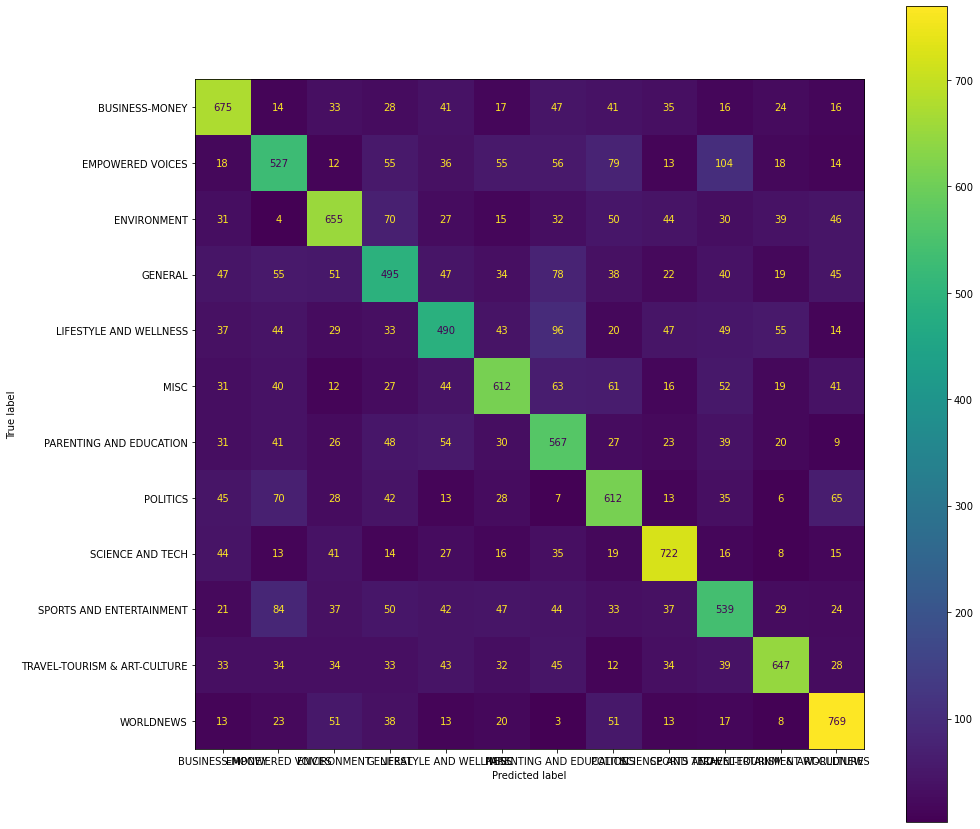

In [49]:
build_and_eval_model(model = MultinomialNB(alpha=.05), X = X, y = y)

In [32]:
'''
params = {
    'alpha':[ 0.1, 0.2, 0.4, 1],
}

grid_search_cv = GridSearchCV(
    estimator = MultinomialNB(),
    param_grid = params,
    scoring = 'f1_weighted'
)

grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_params_)

model = grid_search_cv.best_estimator_

#Evaluate model
accuracy = model.score(X_test, y_test)
print("Model Accuracy: %f" % accuracy)

# Confusion matrix of our predictions
fig, ax = plt.subplots(figsize=(21, 21))

disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp
'''

'\nparams = {\n    \'alpha\':[ 0.1, 0.2, 0.4, 1],\n}\n\ngrid_search_cv = GridSearchCV(\n    estimator = MultinomialNB(),\n    param_grid = params,\n    scoring = \'f1_weighted\'\n)\n\ngrid_search_cv.fit(X_train, y_train)\nprint(grid_search_cv.best_params_)\n\nmodel = grid_search_cv.best_estimator_\n\n#Evaluate model\naccuracy = model.score(X_test, y_test)\nprint("Model Accuracy: %f" % accuracy)\n\n# Confusion matrix of our predictions\nfig, ax = plt.subplots(figsize=(21, 21))\n\ndisp = plot_confusion_matrix(model, X_test, y_test,\n                             display_labels=model.classes_,\n                             cmap=plt.cm.Blues, ax=ax)\nplt.xticks(rotation=90)\ndisp\n'

## Attempt: Oversample (SMOTE) and use k-cross validation

My guess: too many similar things, will be poorer model

In [35]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', y.shape[0])
print('Resample dataset shape', y_smote.shape[0])

Original dataset shape 200834
Resample dataset shape 487356


In [36]:
total_smote = pd.DataFrame(y_smote, columns = ['category'])
total_smote.category.value_counts()

BUSINESS-MONEY                  40613
ENVIRONMENT                     40613
MISC                            40613
SPORTS AND ENTERTAINMENT        40613
POLITICS                        40613
PARENTING / EDUCATION           40613
SCIENCE AND TECH                40613
WORLDNEWS                       40613
EMPOWERED VOICES                40613
LIFESTYLE AND WELLNESS          40613
TRAVEL-TOURISM / ART-CULTURE    40613
GENERAL                         40613
Name: category, dtype: int64

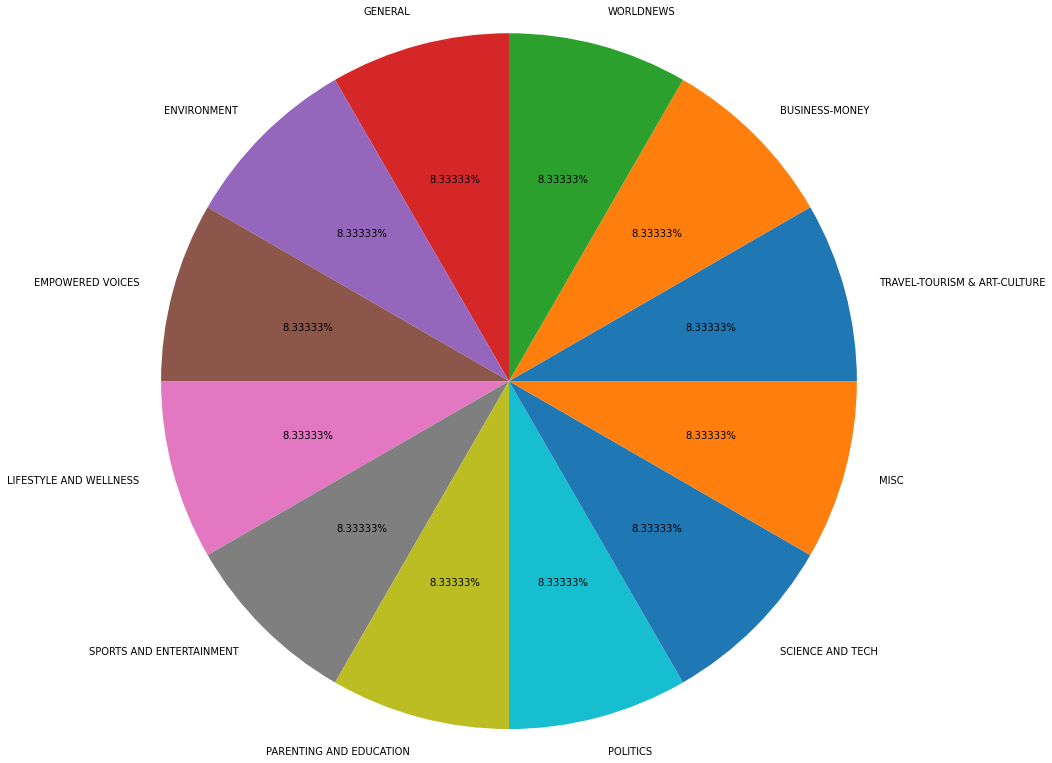

In [60]:
data = total_smote.category.value_counts()
plt.pie(data, labels = data.keys(), autopct="%0.5f%%", radius = 4)
plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.4, random_state=0)

{'alpha': 0.1}
Model Accuracy: 0.789933


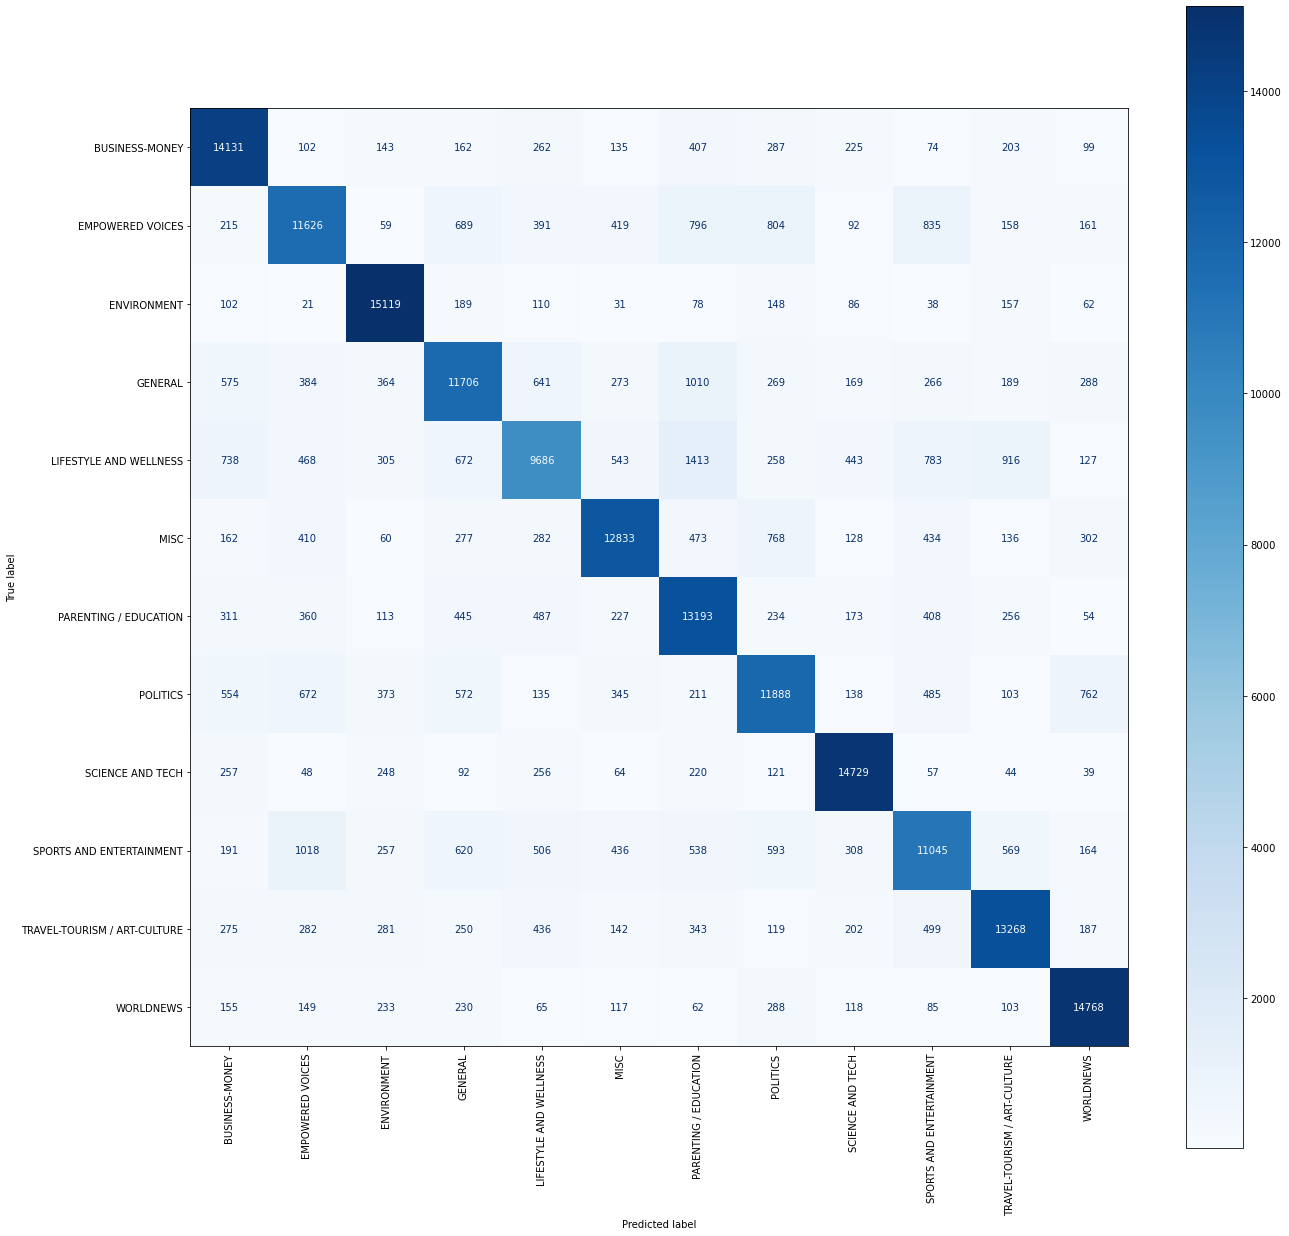

In [38]:
params = {
    'alpha':[ 0.1, 0.2, 0.4, 1],
}

grid_search_cv = GridSearchCV(
    estimator = MultinomialNB(),
    param_grid = params,
    scoring = 'f1_weighted'
)

grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_params_)

model = grid_search_cv.best_estimator_

#Evaluate model
accuracy = model.score(X_test, y_test)
print("Model Accuracy: %f" % accuracy)

# Confusion matrix of our predictions
fig, ax = plt.subplots(figsize=(21, 21))

disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

In [39]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=model.classes_))

                              precision    recall  f1-score   support

              BUSINESS-MONEY       0.80      0.87      0.83     16230
            EMPOWERED VOICES       0.75      0.72      0.73     16245
                 ENVIRONMENT       0.86      0.94      0.90     16141
                     GENERAL       0.74      0.73      0.73     16134
      LIFESTYLE AND WELLNESS       0.73      0.59      0.65     16352
                        MISC       0.82      0.79      0.81     16265
       PARENTING / EDUCATION       0.70      0.81      0.75     16261
                    POLITICS       0.75      0.73      0.74     16238
            SCIENCE AND TECH       0.88      0.91      0.89     16175
    SPORTS AND ENTERTAINMENT       0.74      0.68      0.71     16245
TRAVEL-TOURISM / ART-CULTURE       0.82      0.81      0.82     16284
                   WORLDNEWS       0.87      0.90      0.88     16373

                    accuracy                           0.79    194943
                  

In [40]:
def predictText(text):
    print(text)
    xIn = text_pipeline(text)
    xIn = vectorizer.transform([xIn])
    print('Predicted category: ', model.predict(xIn)[0])
    data = {
        'Category': np.unique(y_smote),
        'weight': model.predict_proba(xIn)[0],
    }
    results = pd.DataFrame(data)
    print( results.sort_values('weight', ascending=False))
    print(model.predict_proba(xIn))

In [41]:
titleSet = [
    'Obama Presidential Election Scandal',
    "Trump to launch new social media platform TRUTH Social",
    'Taxi-hailing firm reveals 4,158 reports of sexual assault',
    'Students sue Texas school district for banning long hair on boys',
    'Crime-hit Chicago grapples with police vaccine revolt'
]
for title in titleSet:
    predictText(title)
    print()

Obama Presidential Election Scandal
Predicted category:  POLITICS
                        Category    weight
7                       POLITICS  0.643839
11                     WORLDNEWS  0.216848
1               EMPOWERED VOICES  0.038145
9       SPORTS AND ENTERTAINMENT  0.028479
0                 BUSINESS-MONEY  0.027828
5                           MISC  0.027296
2                    ENVIRONMENT  0.005280
6          PARENTING / EDUCATION  0.003976
4         LIFESTYLE AND WELLNESS  0.003455
3                        GENERAL  0.002548
10  TRAVEL-TOURISM / ART-CULTURE  0.001406
8               SCIENCE AND TECH  0.000899
[[0.02782821 0.03814502 0.00527984 0.00254772 0.00345492 0.02729578
  0.00397642 0.64383882 0.00089889 0.02847949 0.00140647 0.21684841]]

Trump to launch new social media platform TRUTH Social
Predicted category:  SCIENCE AND TECH
                        Category    weight
8               SCIENCE AND TECH  0.316187
5                           MISC  0.161293
0             

In [45]:
titleSet2 = [
    'App Store Awards honor the best apps and games of 2021',
    "Dallas at New Orleans Prediction, Game Preview",
    'Living Robots Called Xenobots Can Now Reproduce, Scientists Say',
    'Germany announces nationwide lockdown for the unvaccinated',
    'The omicron panic is overdone. Buy the dips in these stocks, says JPMorgan.'
]
for title in titleSet2:
    predictText(title)
    print()

App Store Awards honor the best apps and games of 2021
Predicted category:  LIFESTYLE AND WELLNESS
                        Category    weight
4         LIFESTYLE AND WELLNESS  0.210847
6          PARENTING / EDUCATION  0.169810
8               SCIENCE AND TECH  0.155484
10  TRAVEL-TOURISM / ART-CULTURE  0.106449
1               EMPOWERED VOICES  0.104930
5                           MISC  0.071692
9       SPORTS AND ENTERTAINMENT  0.068572
3                        GENERAL  0.065096
11                     WORLDNEWS  0.022366
0                 BUSINESS-MONEY  0.017633
7                       POLITICS  0.005027
2                    ENVIRONMENT  0.002094
[[0.01763328 0.10492972 0.00209402 0.0650963  0.21084703 0.07169175
  0.1698104  0.00502676 0.1554838  0.06857234 0.10644857 0.02236603]]

Dallas at New Orleans Prediction, Game Preview
Predicted category:  SPORTS AND ENTERTAINMENT
                        Category    weight
9       SPORTS AND ENTERTAINMENT  0.699491
7                       

# K-Fold

In [62]:
#confirming how to use k-fold
kf = KFold(n_splits=2, random_state=0, shuffle=True)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X[train_index].shape)

TRAIN: [     1      2      4 ... 200830 200831 200833] TEST: [     0      3      5 ... 200828 200829 200832]
(100417, 67431)
TRAIN: [     0      3      5 ... 200828 200829 200832] TEST: [     1      2      4 ... 200830 200831 200833]
(100417, 67431)


In [64]:
#USING X_smote, y_smote

kf = KFold(n_splits=5, random_state=0, shuffle=True)
for train_index, test_index in kf.split(X_smote):
    X_train , X_test = X_smote[train_index] , X_smote[test_index]
    y_train , y_test = y_smote[train_index] , y_smote[test_index]
    
    params = {
        'alpha':[0.001, 0.01],
    }

    grid_search_cv = GridSearchCV(
        estimator = MultinomialNB(),
        param_grid = params,
        scoring = 'f1_weighted'
    )

    grid_search_cv.fit(X_train, y_train)
    print(grid_search_cv.best_params_)

    model = grid_search_cv.best_estimator_
    print(X_smote[train_index].shape)

    #Evaluate model
    accuracy = model.score(X_test, y_test)
    print("Model Accuracy: %f" % accuracy)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=model.classes_))


{'alpha': 0.001}
(389884, 67431)
Model Accuracy: 0.813300
                              precision    recall  f1-score   support

              BUSINESS-MONEY       0.83      0.90      0.86      8205
            EMPOWERED VOICES       0.77      0.75      0.76      8117
                 ENVIRONMENT       0.90      0.95      0.92      8117
                     GENERAL       0.78      0.77      0.78      8113
      LIFESTYLE AND WELLNESS       0.73      0.60      0.66      8164
                        MISC       0.84      0.81      0.82      8182
     PARENTING AND EDUCATION       0.73      0.83      0.78      8013
                    POLITICS       0.77      0.74      0.75      8083
            SCIENCE AND TECH       0.90      0.93      0.92      8115
    SPORTS AND ENTERTAINMENT       0.75      0.71      0.73      8098
TRAVEL-TOURISM & ART-CULTURE       0.84      0.85      0.85      8133
                   WORLDNEWS       0.89      0.92      0.90      8132

                    accuracy  